In [5]:
#File: hw8.ipynb
import pandas as pd

In [6]:
df = pd.read_csv("state_data.csv")
df.shape #52 rows and 4 columns

(52, 4)

In [7]:
print(df.head())
print(df.tail())

# 1. the different columns represent different types of data about each state
# 2. the first state in the data set is Alaska 
# 3. the last state is wyoming
# 4. there are 52 entries total
# 5. My assumption would be this list includes territories such as Washington DC and puerto Rico


  state   latitude   longitude        name
0    AK  63.588753 -154.493062      Alaska
1    AL  32.318231  -86.902298     Alabama
2    AR  35.201050  -91.831833    Arkansas
3    AZ  34.048928 -111.093731     Arizona
4    CA  36.778261 -119.417932  California
   state   latitude   longitude           name
47    VT  44.558803  -72.577841        Vermont
48    WA  47.751074 -120.740139     Washington
49    WI  43.784440  -88.787868      Wisconsin
50    WV  38.597626  -80.454903  West Virginia
51    WY  43.075968 -107.290284        Wyoming


In [8]:
median_latitude = df['latitude'].median()
median_longitude = df['longitude'].median()
print(f'The median latitude is: {median_latitude:.2f} and the median longitude is: {median_longitude:.2f}')

distance_to_median_latitude = abs(df['latitude'] - median_latitude)
df['distance to median latitude'] = distance_to_median_latitude
distance_to_median_longitude = abs(df['longitude'] - median_longitude)
df['distance to median longitude'] = distance_to_median_longitude
 #Now the datafreame has 52 columns with 6 rows

min_index_latitude = df['distance to median latitude'].argmin()
max_index_latitude = df['distance to median latitude'].argmax()
min_index_longitude = df['distance to median longitude'].argmin()
max_index_longitude = df['distance to median longitude'].argmax()

print(f'The closest state to the median latitude is {df.iloc[min_index_latitude, 3]} with a distance of {df.iloc[min_index_latitude, 4]:.2f}.')
print(f'The furthest state to the median latitude is {df.iloc[max_index_latitude, 3]} with a distance of {df.iloc[max_index_latitude, 4]:.2f}.')
print(f'The closest state to the median longitude is {df.iloc[min_index_longitude, 3]} with a distance of {df.iloc[min_index_longitude, 4]:.2f}.')
print(f'The furthest state to the median longitude is {df.iloc[max_index_longitude, 3]} with a distance of {df.iloc[max_index_longitude, 4]:.2f}.')

The median latitude is: 39.44 and the median longitude is: -89.09
The closest state to the median latitude is Colorado with a distance of 0.11.
The furthest state to the median latitude is Alaska with a distance of 24.15.
The closest state to the median longitude is Illinois with a distance of 1.20.
The furthest state to the median longitude is Hawaii with a distance of 19.54.


In [9]:
pd.melt(df)
#This function turns the dataframe into a nX2 array which is helpful for several plotting and visualization platforms

,variable,value
0,state,AK
1,state,AL
2,state,AR
3,state,AZ
4,state,CA
...,...,...
307,distance to median longitude,16.515357
308,distance to median longitude,31.646941
309,distance to median longitude,0.30533
310,distance to median longitude,8.638295


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = sns.load_dataset('planets')
df = df.dropna(axis=0) #decided to drop the rows with nan rather than columns so I had more ciolumns to do later parts
df.shape #(498, 6) meaning there are 498 rows and 6 columns
print(df.head())
print(df.tail())
#method: I think this column represents how the planet was found
#number: I think this represents the number of planets at these paramenters??\
#orbital_period: the period of the plabnet around its star
#mass: the total mass fo the planet
#distance: I believe this is the distnace of the planet from us
#year: I believe this is the year we discovered the planet

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
              method  number  orbital_period   mass  distance  year
640  Radial Velocity       1       111.70000  2.100     14.90  2009
641  Radial Velocity       1         5.05050  1.068     44.46  2013
642  Radial Velocity       1       311.28800  1.940     17.24  1999
649          Transit       1         2.70339  1.470    178.00  2013
784  Radial Velocity       3       580.00000  0.947    135.00  2012


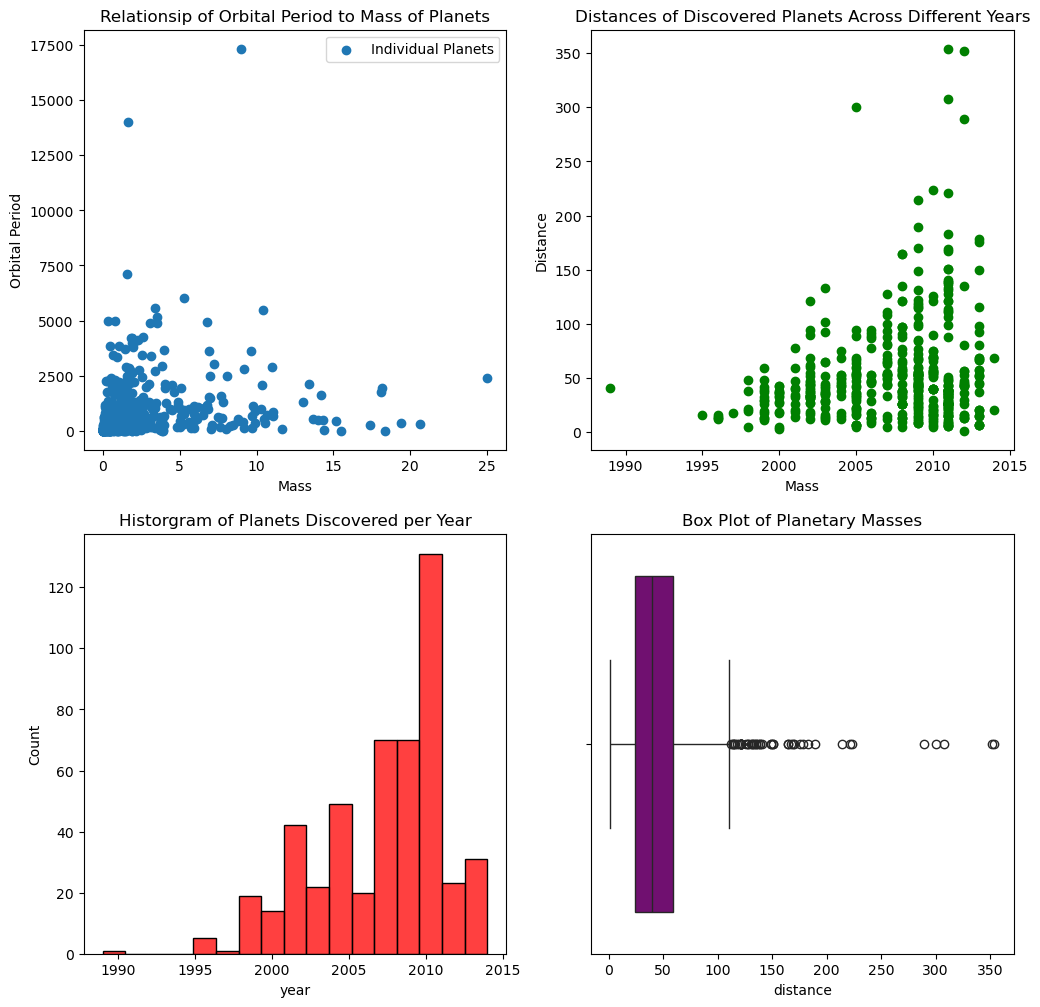

In [12]:
fig, axs = plt.subplots(2,2, figsize = (12,12))

axs[0,0].scatter(df['mass'], df['orbital_period'], label = "Individual Planets")
axs[0,0].set_title("Relationsip of Orbital Period to Mass of Planets")
axs[0,0].set_xlabel("Mass")
axs[0,0].set_ylabel("Orbital Period")
axs[0,0].legend()

axs[0,1].scatter(df['year'], df['distance'], c='green')
axs[0,1].set_title("Distances of Discovered Planets Across Different Years")
axs[0,1].set_xlabel("Mass")
axs[0,1].set_ylabel("Distance")

sns.histplot(data=df, x=df['year'], ax = axs[1,0], color = "red")
axs[1,0].set_title("Historgram of Planets Discovered per Year")

sns.boxplot(data = df, x=df['distance'], ax = axs[1,1], color = 'purple')
axs[1,1].set_title("Box Plot of Planetary Masses")

plt.show()

#The top left subplot shows that there is no singnificant relationship between the mass of a planet and its orbital period. From this plot it confirmed that mass and period have no relation
# THe top right plto shows that as time went on we were able to discover planets that were further and further away, this plot confirmed that we imporved planetary detection as time went on
# The bottom left plot shows the number of planets discovered in a given year, this plot was interestign as it showed there was a peak in planetary discory in 2010
# The bottom right shows a box plot of the masses of planets with most of the data existing as outliers, this plot showed me that planetary masses dont follow a statistacal pattern as expected. 